Columns: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']

Linear Regression:
R² Score: 0.26283619645694944
RMSE: 1.2953243457046082

Decision Tree:
R² Score: 0.8983813453473767
RMSE: 0.4809315267665352

Random Forest:
R² Score: 0.9453054987910234
RMSE: 0.35283231983797136


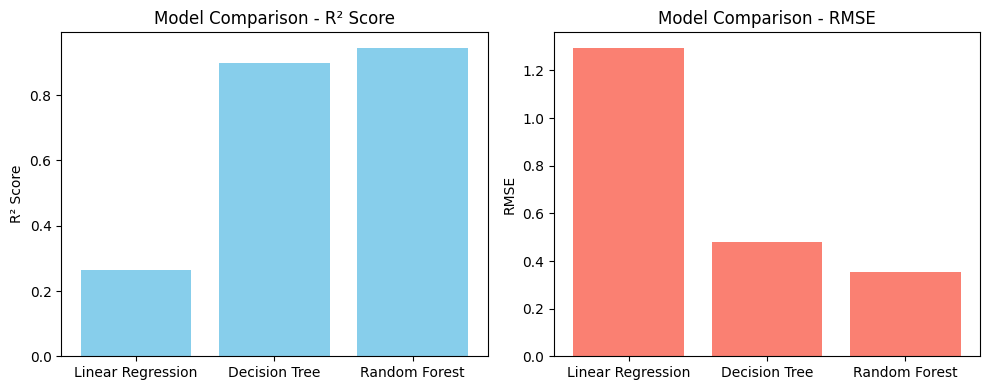

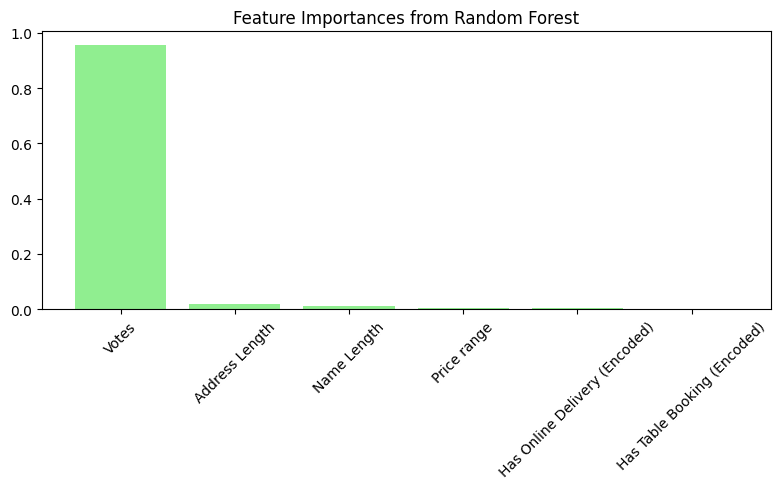

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Tuned Random Forest:
R² Score: 0.9497529393965746
RMSE: 0.3381830663650712


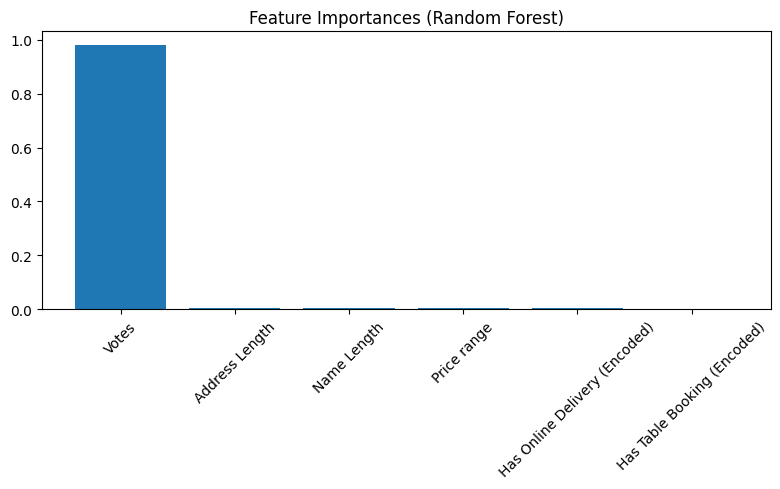

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv('Dataset .csv')
print("Columns:", df.columns.tolist())

# Feature Engineering
df['Name Length'] = df['Restaurant Name'].apply(lambda x: len(str(x)))
df['Address Length'] = df['Address'].apply(lambda x: len(str(x)))
df['Has Table Booking (Encoded)'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online Delivery (Encoded)'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

# Features and Target
X = df[['Votes', 'Price range', 'Has Table Booking (Encoded)',
        'Has Online Delivery (Encoded)', 'Name Length', 'Address Length']]
y = df['Aggregate rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Linear Regression ---
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print("\nLinear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# --- Decision Tree Regressor ---
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print("\nDecision Tree:")
print("R² Score:", r2_score(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

# --- Random Forest Regressor ---
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("\nRandom Forest:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
import matplotlib.pyplot as plt

# Store results
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_dt),
    r2_score(y_test, y_pred_rf)
]
rmse_scores = [
    np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    np.sqrt(mean_squared_error(y_test, y_pred_dt)),
    np.sqrt(mean_squared_error(y_test, y_pred_rf))
]

# Plot R² Scores
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.bar(models, r2_scores, color='skyblue')
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')

# Plot RMSE
plt.subplot(1, 2, 2)
plt.bar(models, rmse_scores, color='salmon')
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

# Get feature importances from Random Forest
importances = model_rf.feature_importances_
features = X.columns

# Sort features by importance
indices = importances.argsort()[::-1]

plt.figure(figsize=(8,5))
plt.title('Feature Importances from Random Forest')
plt.bar(range(len(importances)), importances[indices], color='lightgreen', align='center')
plt.xticks(range(len(importances)), features[indices], rotation=45)
plt.tight_layout()
plt.show()
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit to the training data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)

# Best model after tuning
best_rf = grid_search.best_estimator_

# Predict and evaluate on the test set
y_pred_best_rf = best_rf.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2_best = r2_score(y_test, y_pred_best_rf)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))

print("Tuned Random Forest:")
print("R² Score:", r2_best)
print("RMSE:", rmse_best)

import matplotlib.pyplot as plt

# Get feature importances from the tuned model
importances = best_rf.feature_importances_

feature_names = X.columns

# Sort them for visualization
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(8, 5))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()
